PCA or multiple linear regression ??
--> did linear regression to start with

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data
data = pd.ExcelFile('GordonChristopher_LE BN CR data for figures - Body Comp.xlsx')
sheetnames=data.sheet_names

In [3]:
# import all the worksheets
d={}
sheetname=[None] * 13
for i in range(13):
    name=sheetnames[i].replace(' ', '') # remove space from the worksheetname
    sheetname[i]=name
    if i == 0:
        globals()[name]= data.parse(sheetnames[i],header=1)
    else:
        globals()[name]= data.parse(sheetnames[i])

In [4]:
# clean up the data
mymice=np.arange(60)
for x in sheetname:
    existmice=np.where(pd.isnull(globals()[x].iloc[:,6])==False) # remove overfat and dead mice
    notaverow=np.where(pd.isnull(globals()[x].iloc[:,0])==False) # remove average row from data
    bothrow=np.intersect1d(existmice,notaverow) # the overlapping row within one worksheet
    mymice=np.intersect1d(mymice,bothrow) # overlapping between worksheet

In [5]:
# get the 'new' dataset
newsheetname=[None] * 13
for i in range(13):
    x='new'+sheetname[i]
    newsheetname[i]=x
    globals()[x]=globals()[sheetname[i]].iloc[mymice,:] # only the mice never have miss any data

common variable

In [6]:
# test and train ind base on dataframe input
def test_train_id(data,test_frac):
    testnumber=round(len(data)*test_frac)
    ids=list(data.index)
    np.random.shuffle(ids)
    test=ids[0:testnumber]
    test.sort()
    train=ids[testnumber:]  
    train.sort()
    return train,test,len(data)-testnumber

In [7]:
day=[89,117,152,180,209,244,272,300,335,363,384,421,447]

## 1. BN ad lib + Weight

coef is [ 0.41374984]
intercept is 260.333088206


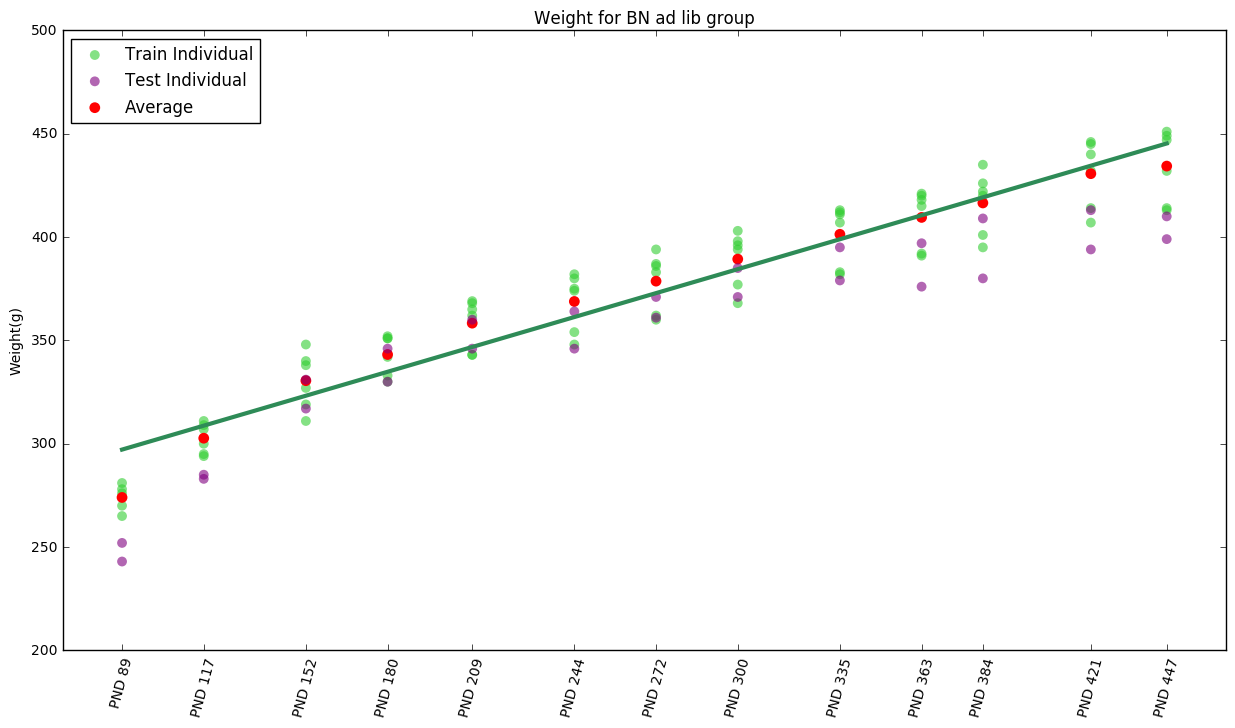

In [8]:
# random assign train and test ind based on 'first day'
BLPND89=globals()[newsheetname[0]][globals()[newsheetname[0]]['Group'].str.contains('BN ad lib',case=False)]
BLtrain,BLtest,BLtrainnumber=test_train_id(BLPND89,0.3)
# pull data based on ind
BLtrainweight=[None]*13
BLtestweight=[None]*13
BLavetrainweight=[None]*13
for i in range(13):
    bl=globals()[sheetname[i]].iloc[BLtest,:]
    BLtestweight[i]=bl['Sample Weight (g)']
    bl=globals()[sheetname[i]].iloc[BLtrain,:]
    BLtrainweight[i]=bl['Sample Weight (g)']
    BLavetrainweight[i]=np.mean(bl['Sample Weight (g)'])
# linear regression
from sklearn.linear_model import LinearRegression
model1 = LinearRegression(fit_intercept=True)
model1.fit(np.asarray(day)[:,np.newaxis], np.asarray(BLavetrainweight))
print('coef is',model1.coef_)
print('intercept is',model1.intercept_)
# rearrange test data
o=np.asarray(BLtestweight)
BLtestw=np.zeros(([2,13]))
for i in range(13):
    m=o[i]
    for j in range(2):
        BLtestw[j,i]=m[j]
# rearrange train data
o=np.asarray(BLtrainweight)
BLtrainw=np.zeros(([6,13]))
for i in range(13):
    m=o[i]
    for j in range(6):
        BLtrainw[j,i]=m[j]
# train data point
Fig=plt.figure(figsize=(15,8))
for xe, ye in zip(day, BLtrainweight):
    indi=plt.scatter([xe] * len(ye), ye, c="limegreen",alpha=0.6,s=50,edgecolors='none')
plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
plt.axes().set_xticklabels(sheetnames,rotation=75)
# average point
average=plt.scatter(day,BLavetrainweight, c="red",s=60,edgecolors='none',label="Aveage")
# plot linear regression
plt.plot(np.asarray(day), model1.predict(np.asarray(day)[:, np.newaxis]), color='seagreen',linewidth=3)
# plot test group
for xe, ye in zip(day, BLtestweight):
    testindi=plt.scatter([xe] * len(ye), ye, c="purple",alpha=0.6,s=50,edgecolors='none')
# set up figure 
plt.legend((indi,testindi,average),('Train Individual','Test Individual','Average'),scatterpoints=1,loc='upper left')
plt.title('Weight for BN ad lib group')
plt.ylabel('Weight(g)')

In [18]:
BLtestweight[3]-340

0   -10.0
1     6.0
Name: Sample Weight (g), dtype: float64

In [23]:
abs(BLtestweight[3]-340)

0    10.0
1     6.0
Name: Sample Weight (g), dtype: float64

In [14]:
sum((BLtestweight[-1]-300)/BLtestweight[-1])/2

0.25820649183935451

## 2. BN 10% restriction + Weight

In [ ]:
# random assign train and test ind based on 'first day'
BLPND89=globals()[newsheetname[0]][globals()[newsheetname[0]]['Group'].str.contains('BN 10% restriction',case=False)]
BLtrain,BLtest,BLtrainnumber=test_train_id(BLPND89,0.3)
# pull data based on ind
BLtrainweight=[None]*13
BLtestweight=[None]*13
BLavetrainweight=[None]*13
for i in range(13):
    bl=globals()[sheetname[i]].iloc[BLtest,:]
    BLtestweight[i]=bl['Sample Weight (g)']
    bl=globals()[sheetname[i]].iloc[BLtrain,:]
    BLtrainweight[i]=bl['Sample Weight (g)']
    BLavetrainweight[i]=np.mean(bl['Sample Weight (g)'])
# linear regression
from sklearn.linear_model import LinearRegression
model2 = LinearRegression(fit_intercept=True)
model2.fit(np.asarray(day)[:,np.newaxis], np.asarray(BLavetrainweight))
print('coef is',model1.coef_)
print('intercept is',model1.intercept_)
# rearrange test data
o=np.asarray(BLtestweight)
BLtestw=np.zeros(([2,13]))
for i in range(13):
    m=o[i]
    for j in range(2):
        BLtestw[j,i]=m[j]
# rearrange train data
o=np.asarray(BLtrainweight)
BLtrainw=np.zeros(([6,13]))
for i in range(13):
    m=o[i]
    for j in range(5):
        BLtrainw[j,i]=m[j]
# train data point
Fig=plt.figure(figsize=(15,8))
for xe, ye in zip(day, BLtrainweight):
    indi=plt.scatter([xe] * len(ye), ye, c="limegreen",alpha=0.6,s=50,edgecolors='none')
plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
plt.axes().set_xticklabels(sheetnames,rotation=75)
# average point
average=plt.scatter(day,BLavetrainweight, c="red",s=60,edgecolors='none',label="Aveage")
# plot linear regression
plt.plot(np.asarray(day), model2.predict(np.asarray(day)[:, np.newaxis]), color='seagreen',linewidth=3)
# plot test group
for xe, ye in zip(day, BLtestweight):
    testindi=plt.scatter([xe] * len(ye), ye, c="purple",alpha=0.6,s=50,edgecolors='none')
# set up figure 
plt.legend((indi,testindi,average),('Train Individual','Test Individual','Average'),scatterpoints=1,loc='upper left')
plt.title('Weight for BN 10% restriction')
plt.ylabel('Weight(g)')

## 3. BN 20% restriction

In [ ]:
# random assign train and test ind based on 'first day'
BLPND89=globals()[newsheetname[0]][globals()[newsheetname[0]]['Group'].str.contains('BN 20% restriction',case=False)]
BLtrain,BLtest,BLtrainnumber=test_train_id(BLPND89,0.3)
# pull data based on ind
BLtrainweight=[None]*13
BLtestweight=[None]*13
BLavetrainweight=[None]*13
for i in range(13):
    bl=globals()[sheetname[i]].iloc[BLtest,:]
    BLtestweight[i]=bl['Sample Weight (g)']
    bl=globals()[sheetname[i]].iloc[BLtrain,:]
    BLtrainweight[i]=bl['Sample Weight (g)']
    BLavetrainweight[i]=np.mean(bl['Sample Weight (g)'])
# linear regression
from sklearn.linear_model import LinearRegression
model3 = LinearRegression(fit_intercept=True)
model3.fit(np.asarray(day)[:,np.newaxis], np.asarray(BLavetrainweight))
print('coef is',model1.coef_)
print('intercept is',model1.intercept_)
# rearrange test data
o=np.asarray(BLtestweight)
BLtestw=np.zeros(([2,13]))
for i in range(13):
    m=o[i]
    for j in range(2):
        BLtestw[j,i]=m[j]
# rearrange train data
o=np.asarray(BLtrainweight)
BLtrainw=np.zeros(([6,13]))
for i in range(13):
    m=o[i]
    for j in range(6):
        BLtrainw[j,i]=m[j]
# train data point
Fig=plt.figure(figsize=(15,8))
for xe, ye in zip(day, BLtrainweight):
    indi=plt.scatter([xe] * len(ye), ye, c="limegreen",alpha=0.6,s=50,edgecolors='none')
plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
plt.axes().set_xticklabels(sheetnames,rotation=75)
# average point
average=plt.scatter(day,BLavetrainweight, c="red",s=60,edgecolors='none',label="Aveage")
# plot linear regression
plt.plot(np.asarray(day), model3.predict(np.asarray(day)[:, np.newaxis]), color='seagreen',linewidth=3)
# plot test group
for xe, ye in zip(day, BLtestweight):
    testindi=plt.scatter([xe] * len(ye), ye, c="purple",alpha=0.6,s=50,edgecolors='none')
# set up figure 
plt.legend((indi,testindi,average),('Train Individual','Test Individual','Average'),scatterpoints=1,loc='upper left')
plt.title('Weight for BN 20% restriction')
plt.ylabel('Weight(g)')

In [ ]:
Fig=plt.figure(figsize=(15,8))
plt.plot(np.asarray(day), model1.predict(np.asarray(day)[:, np.newaxis]), color='red',linewidth=3,label='BN ad lib')
plt.plot(np.asarray(day), model2.predict(np.asarray(day)[:, np.newaxis]), color='blue',linewidth=3,label='BN 10% restriction')
plt.plot(np.asarray(day), model3.predict(np.asarray(day)[:, np.newaxis]), color='green',linewidth=3,label='BN 20% restriction')
plt.legend(loc='upper left')
plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
plt.xlim(88,450)
plt.ylim(200,500)
plt.axes().set_xticklabels(sheetnames,rotation=75)
plt.title('linear regression for weight of three BN groups')
plt.ylabel('Weight(g)')
plt.xlabel('Day')

In [ ]:
globals()[newsheetname[0]][globals()[newsheetname[0]]['Group'].str.contains('BN 20% restriction',case=False)]

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model1 = make_pipeline(PolynomialFeatures(1),LinearRegression())
poly_model1.fit(BLtrainw[:,0][:,np.newaxis], BLtrainw[:,1])


In [ ]:
np.asarray(BLavetrainweight)[1]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(np.asarray(day)[:,np.newaxis], np.asarray(BLavetrainweight))

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model.fit(np.asarray(day)[:,np.newaxis], np.asarray(BLavetrainweight))
#yfit = poly_model.predict(xfit[:, np.newaxis])

In [ ]:
BLtestw[1,0]

In [ ]:
# column header
list(BLPND89)

In [ ]:
BLtestweight

In [ ]:
BLtrain,BLtest=test_train_id(BL,0.3)

BLWeight=BL['Sample Weight (g)'] # the weight for BL group

y[i]=BNL # all the weight on the same day as one part in the list y
ave[i]=np.mean(BNL) # average weight on each day
x=[89,117,152,180,209,244,272,300,335,363,384,421,447]

In [ ]:
BLWeight[None] * 13
=[None] * 13

In [ ]:
days=np.array([80,130,150,160,200,220,250,300,330,380,400,430,450])

In [ ]:
# weight for 'Bn ad lib'
yB10=[None] * 13
aveB10=[None] * 13
for i in range(13):   
    BL10=globals()[newsheetname[i]][globals()[newsheetname[i]]['Group'].str.contains('BN 10% restriction',case=False)]

In [ ]:
indee=list(BL10.index)

In [ ]:
Fig=plt.figure(figsize=(15,8))

for xe, ye in zip(x, y):
    indi=plt.scatter([xe] * len(ye), ye, c="green",alpha=0.6,s=50,edgecolors='none')

plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
plt.axes().set_xticklabels(sheetnames,rotation=75)

average=plt.scatter(x,ave, c="red",s=60,edgecolors='none',label="Aveage")

plt.legend((indi,average),
           ('Individual', 'Average'),
           scatterpoints=1,
           loc='upper left')


from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(np.asarray(x)[:,np.newaxis], np.asarray(ave))

xx = np.linspace(80, 450, 1000)
yy = model.predict(xx[:, np.newaxis])
plt.plot(xx, yy, 'b',linewidth=2.0)

plt.plot(diabetes_X_test, regr.predict(diabetes_X_test[:, np.newaxis]), color='blue',
         linewidth=3)

plt.title('Weight for BN ad lib group')
plt.ylabel('Weight(g)')

In [ ]:
def test_train_id(N,test_frac):
    testnumber=round(N*test_frac)
    ids=np.arange(N)
    np.random.shuffle(ids)
    test=ids[0:testnumber]
    train=ids[testnumber:]       
    return train,test

In [ ]:
whos